## First plot

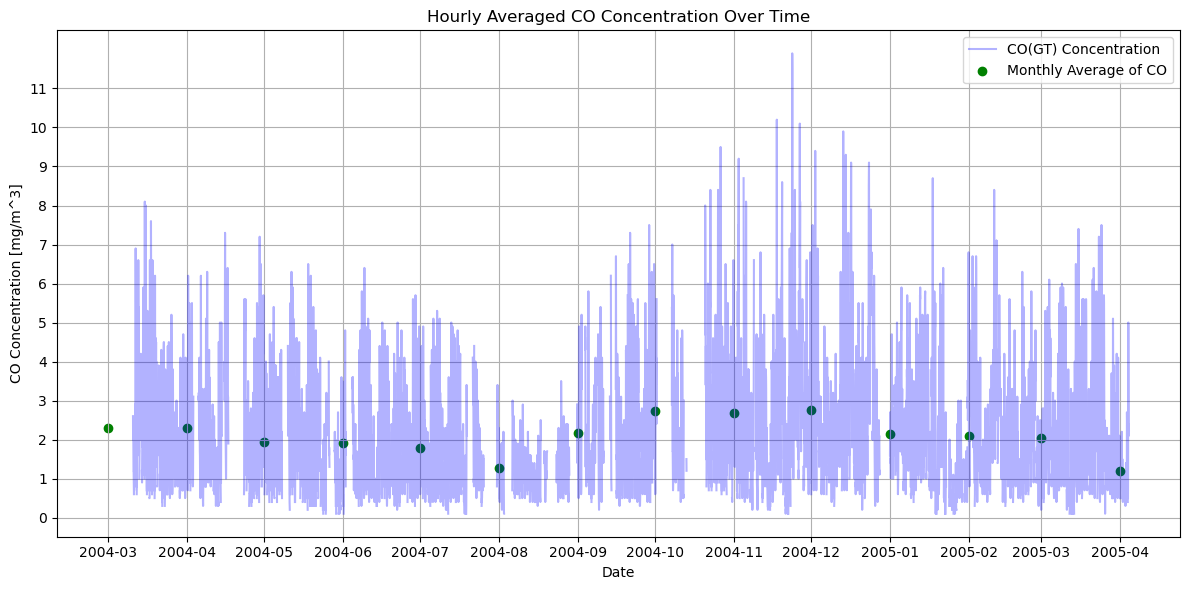

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

import numpy as np


# Load your dataset. Make sure you have downloaded and saved it locally.
# Replace 'your_data.csv' with the actual file path.
data = pd.read_csv("../dataset/AirQuality.csv", sep=";", decimal=',')

#Dropping the last 2 columns (extra & all-nan) 
data.drop(['Unnamed: 15','Unnamed: 16'], axis = 1, inplace = True)

#Dropping extra fully empty rows
data.drop(data.index[9357:9471], inplace = True)

# Replace missing values (-200) with NaN for better plotting.
data = data.replace(-200, float('nan'))

# Extract the date and CO(GT) columns.
date = data['Date'] + ' ' + data['Time']
co_gt = data['CO(GT)']

# Convert the 'Date' and 'Time' columns to datetime objects.
date = pd.to_datetime(date, format='%d/%m/%Y %H.%M.%S')

# Create a new DataFrame with DateTimeIndex.
df = pd.DataFrame({'Date': date, 'CO(GT)': co_gt})
df.set_index('Date', inplace=True)

# Resample data for the first day of each month and calculate monthly average CO values.
monthly_averages = df['CO(GT)'].resample('MS').mean()  # MS represents Month Start frequency

# Extract the values corresponding to the first day of each month.
first_of_month_values = monthly_averages[monthly_averages.index.is_month_start]

# Create a basic line plot.
plt.figure(figsize=(12, 6))
plt.plot(date, co_gt, label='CO(GT) Concentration', color='b', alpha=0.3) # Original data
plt.title('Hourly Averaged CO Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('CO Concentration [mg/m^3]')

plt.scatter(monthly_averages.index, monthly_averages, label='Monthly Average of CO', color='g', marker='o')

# Set the x-axis to show only monthly ticks.
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
# ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

plt.grid(True)
plt.legend()
plt.tight_layout()

# Set y-ticks to start from 0 and increment by 1.
plt.yticks(np.arange(0, int(co_gt.max()) + 1, 1))

# Show the plot.
plt.show()